## Investigation of Hierarchical Models

In [1]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import random
import scipy

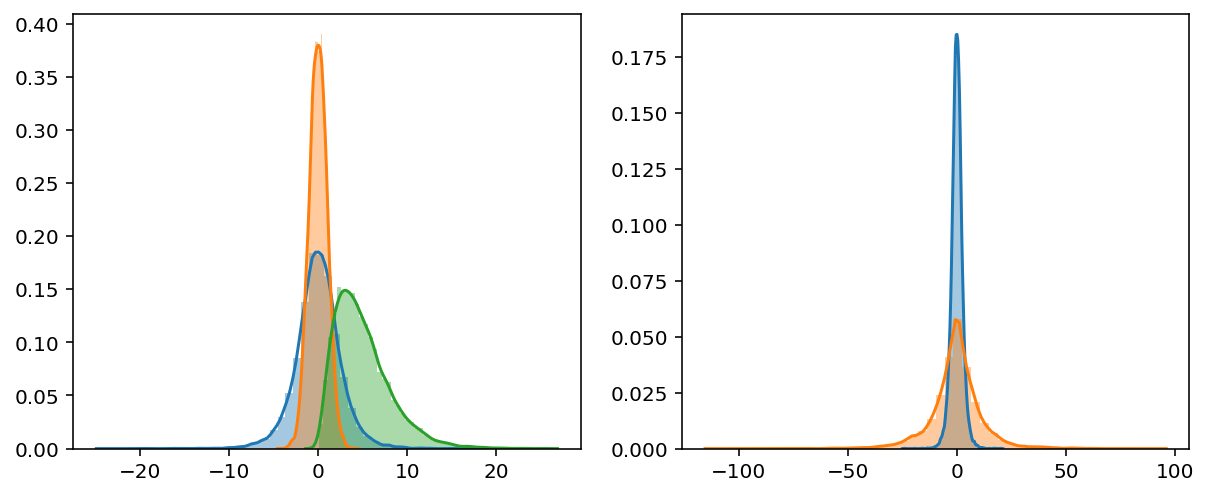

In [3]:
# first simulate from t(mu, sigma)
# then simulate from N(mu, V), V ~ InvChi(sigma)

from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import t


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
df = 5
t_rvs = t.rvs(df = df, scale = 2, size=10000)
sns.distplot(t_rvs, ax = ax[0])

norm_rvs = norm.rvs(loc = 0, scale = 1, size = 10000)
sns.distplot(norm_rvs, ax = ax[0])

chi2_rvs = chi2.rvs(df = df, scale = 1, size = 10000)
sns.distplot(chi2_rvs, ax = ax[0])


sns.distplot(t_rvs, ax = ax[1])

chi2_rvs = chi2.rvs(df = df, scale = 2, size = 10000)
norm_rvs = list(map(lambda x: norm.rvs(loc = 0, scale = x, size = 1)[0], chi2_rvs))
sns.distplot(norm_rvs, ax = ax[1])
plt.show();

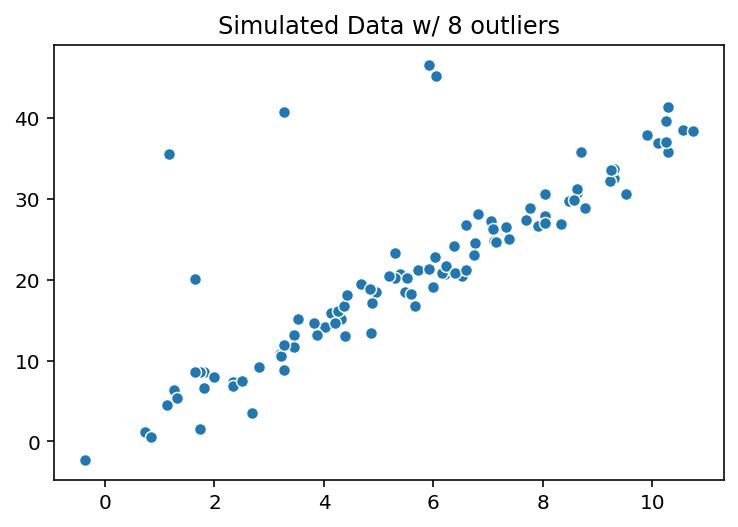

In [105]:
# start by simulating some data
# y = bx + e
np.random.seed(10)

b = 3.55

x = np.linspace(1, 10, 100)
x = x + norm.rvs(loc = 0, scale = 1, size = len(x))

e1 = norm.rvs(loc = 0, scale = 2, size = len(x) - 5)
e2 = abs(norm.rvs(loc = 0, scale = 25, size = len(x) - len(e1)))
e = np.append(e1, e2)
np.random.shuffle(e)

y = b * x + e
sns.scatterplot(x, y).set_title("Simulated Data w/ 8 outliers");

### Start with simple linear regression

Standard deviation:  5.83
Regression coefficient:  3.32


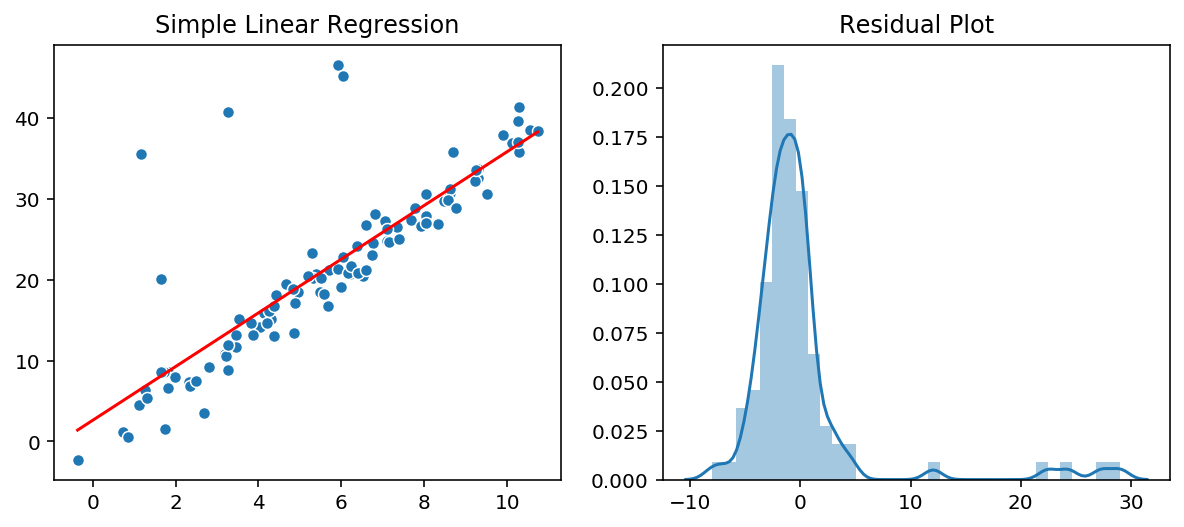

In [106]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
_ = reg.fit(x.reshape(-1, 1), y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x, y, ax = ax[0])
sns.lineplot(x, reg.predict(x.reshape(-1, 1)), 
             color = "red", 
             ax = ax[0]).set_title("Simple Linear Regression");

# find standard deviation:
tmp_sd = y - reg.predict(x.reshape(-1, 1))
print("Standard deviation: ", round(np.std(tmp_sd), 2))
print("Regression coefficient: ", round(reg.coef_[0], 2))
sns.distplot(tmp_sd, ax = ax[1]).set_title("Residual Plot");